**Imports**

In [1]:
from imports import * 
from functions import *
from archs import *
from mylearner import *
%matplotlib inline

**Loading annotated data**

In [2]:
from loading_data import *

data shape: (44106, 23)
        oxygen      pm10     co  temperature    co2    so2    no2       pm1  \
0      20.936  0.548238  1.562       24.276  455.7  -1.96  23.93  0.396847   
1      20.938  0.678546  1.562       24.274  454.4  -2.06  23.90  0.375806   
2      20.937  0.788452  1.562       24.273  454.5  -2.39  23.96  0.447566   
3      20.937  0.890764  1.562       24.271  454.5  -2.69  23.87  0.558607   
4      20.937  0.844628  1.562       24.268  455.0  -2.83  23.90  0.570323   
...       ...       ...    ...          ...    ...    ...    ...       ...   
24375  20.876  2.053462  1.770       22.861  478.4 -30.07  24.49  1.330274   
24376  20.879  2.696659  1.770       22.859  478.9 -30.17  24.44  1.723195   
24377  20.877  2.313910  1.770       22.856  479.0 -30.16  24.55  1.658417   
24378  20.878  2.186051  1.770       22.853  479.4 -30.27  24.58  1.707657   
24379  20.879  2.238261  1.769       22.851  479.7 -30.45  24.61  1.639240   

        dewpt      timestamp  ...     

**Encode target classes (person and window open) classes**

In [3]:
df1 = d1.copy()
df2 = d2.copy()
df = data.copy()

le = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()

labels = ['person','window_open']

for label in labels:
    le.fit(df[label])
    le1.fit(df1[label])
    le2.fit(df2[label])
    df[label]=le.transform(df[label])
    df1[label]=le1.transform(df1[label])
    df2[label]=le2.transform(df2[label])
    print(df[label].value_counts())
    print(df1[label].value_counts())
    print(df2[label].value_counts())

print(df.shape)

0    41876
1     2038
2      189
4        2
3        1
Name: person, dtype: int64
0    18144
1     1440
2      139
4        2
3        1
Name: person, dtype: int64
0    23732
1      598
2       50
Name: person, dtype: int64
0    42801
1     1305
Name: window_open, dtype: int64
0    18701
1     1025
Name: window_open, dtype: int64
0    24100
1      280
Name: window_open, dtype: int64
(44106, 23)


**select some columns to plot**

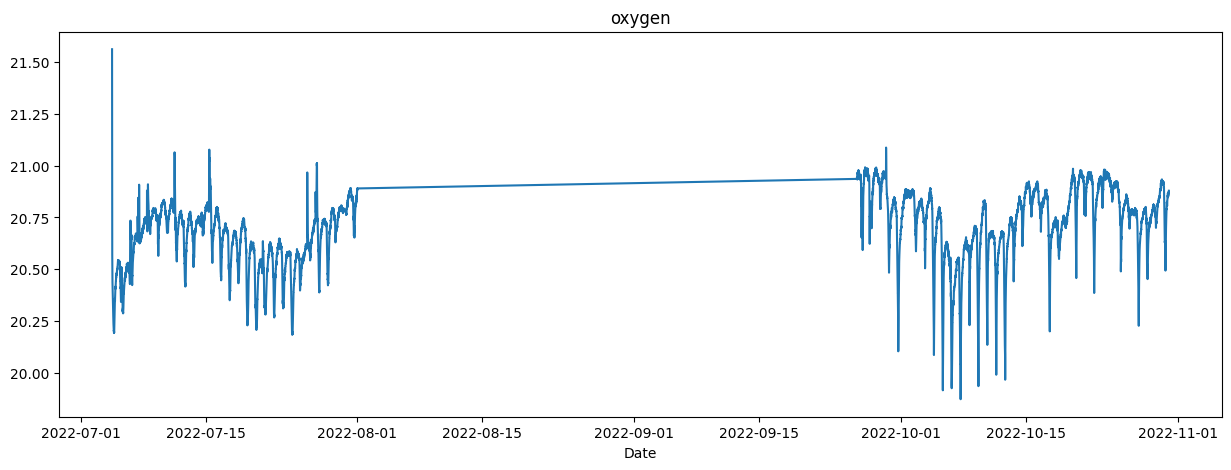

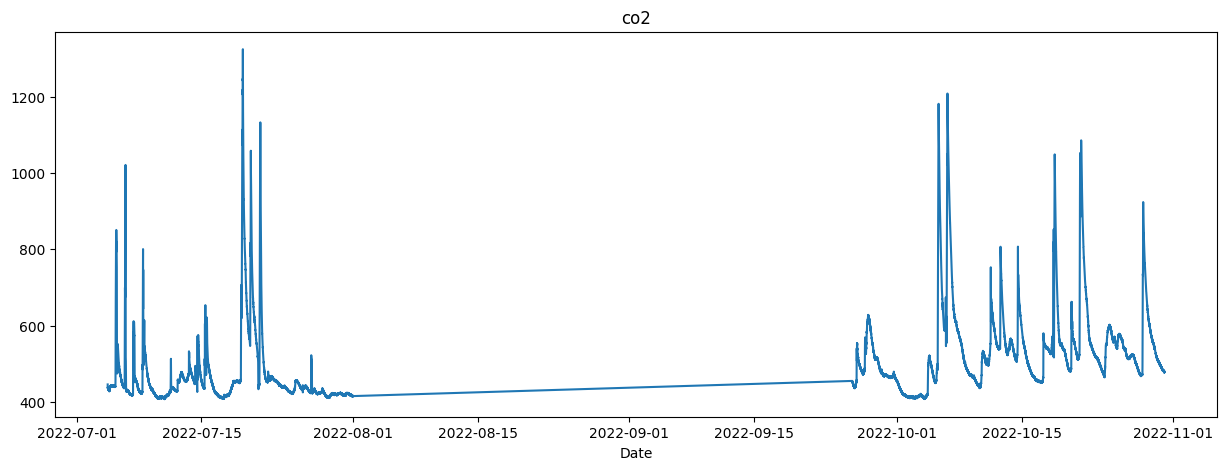

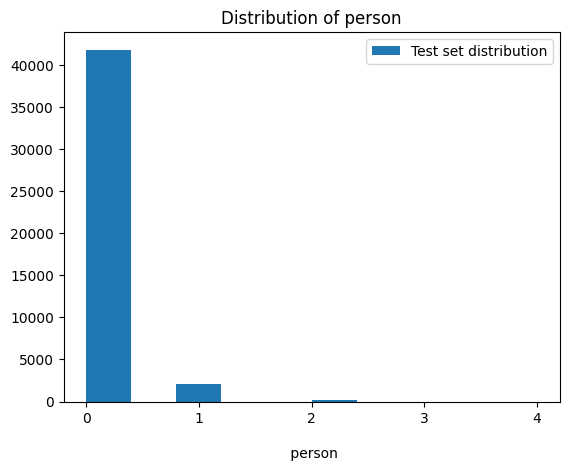

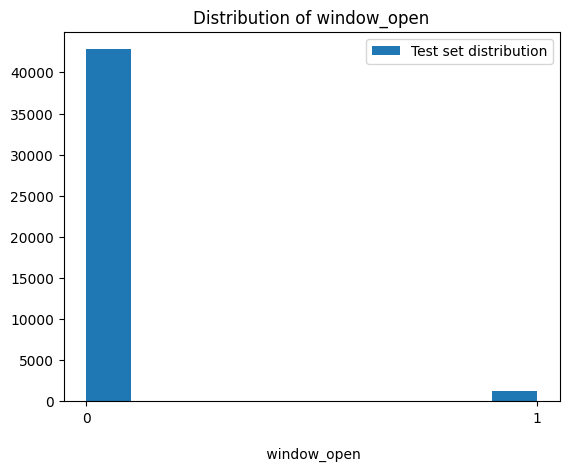

In [4]:
plot_cols = ['oxygen', 'co2','person','window_open']

x = df.datetime

# plot o2 and co2 
for col in plot_cols[0:2]:
    fig = plt.figure(figsize=(15,5))
    plt.plot(x, df[col])
    plt.xlabel('Date')
    plt.title(col)
#plot distribution of number of persons and window open
for col in plot_cols[2:]:
    fig = plt.figure()
    plt.hist(df[col],label='Test set distribution')
    plt.xlabel(f'\n {col}')
## Ticks labels - List must be in ascending order
    plt.xticks(df[col].unique()) ### names of classes starting from 0
    #sns.distplot(df[col], bins=100, kde=False)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
    # plt.figure()
    # df[col].value_counts().plot.pie(autopct='%0.2f')



**plot scaled data in one figure**

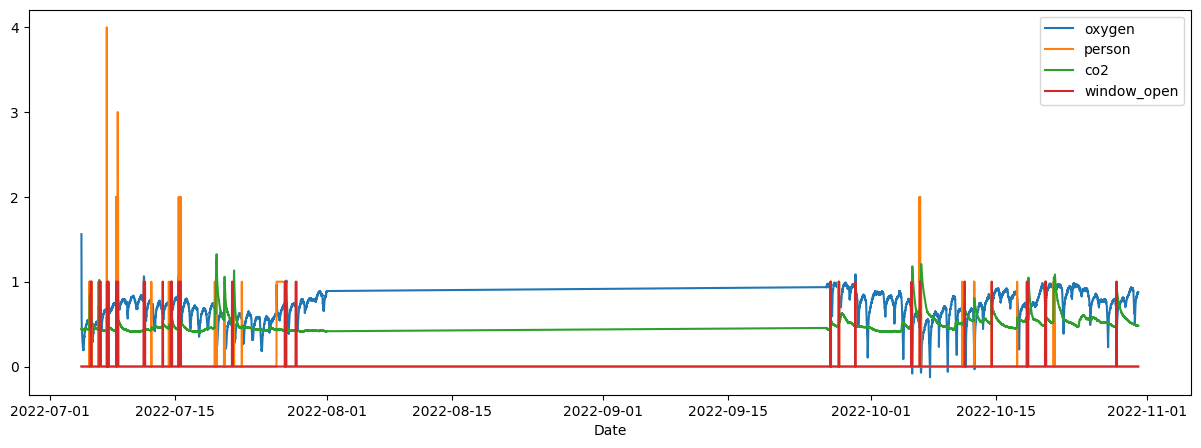

In [5]:
x = df.datetime
fig = plt.figure(figsize=(15,5))

plt.xlabel('Date')
plt.plot(x, df['oxygen']-20,label='oxygen')
plt.plot(x, df['person'],label='person')
plt.plot(x, df['co2']/1000,label='co2')
plt.plot(x, df['window_open'], label='window_open' )
plt.legend()


**filtering data**

In [6]:
# h2s column has only NaN values, also drop timestamp,datetime,deviceid
df.drop(columns=['h2s','timestamp','deviceid','datetime'],inplace=True)
df1.drop(columns=['h2s','timestamp','deviceid','datetime'],inplace=True)
df2.drop(columns=['h2s','timestamp','deviceid','datetime'],inplace=True)




**Missing values, drop NAN**

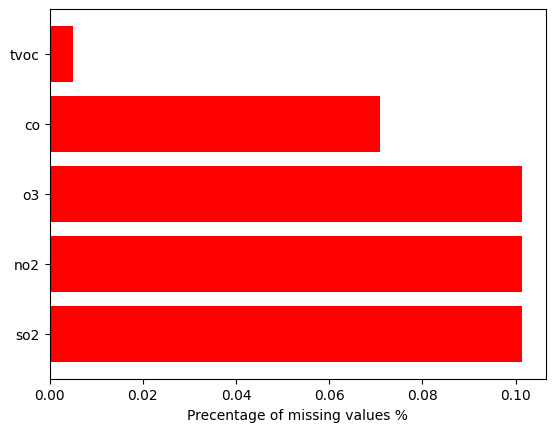

maximum number of missing values per column=  20 

   column  count  percentage
5     so2     20    0.101389
6     no2     20    0.101389
12     o3     20    0.101389
2      co     14    0.070972
9    tvoc      1    0.005069


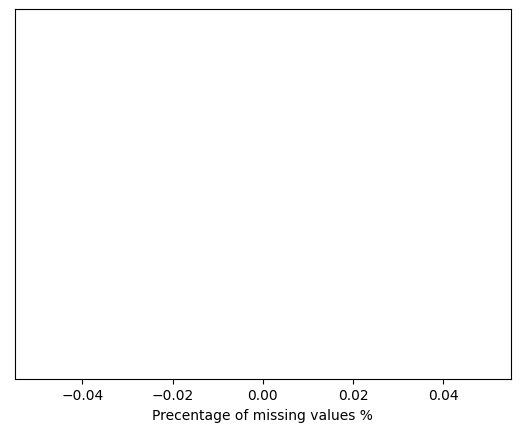

maximum number of missing values per column=  nan 

Empty DataFrame
Columns: [column, count, percentage]
Index: []


In [7]:
missing1 = df1.isnull().sum(0).reset_index()
missing2 = df2.isnull().sum(0).reset_index()
missing1.columns = ['column', 'count']
missing2.columns = ['column', 'count']

missing1 = missing1.sort_values(by = 'count', ascending = False).loc[missing1['count'] > 0]
missing1['percentage'] = missing1['count'] / float(df1.shape[0]) * 100
ind1 = np.arange(missing1.shape[0])
missing2 = missing2.sort_values(by = 'count', ascending = False).loc[missing2['count'] > 0]
missing2['percentage'] = missing2['count'] / float(df2.shape[0]) * 100
ind2 = np.arange(missing2.shape[0])

fig, ax = plt.subplots()
rects = ax.barh(ind1, missing1.percentage.values, color='r')
ax.set_yticks(ind1)
ax.set_yticklabels(missing1.column.values, rotation='horizontal')
ax.set_xlabel("Precentage of missing values %")
plt.show()
print ('maximum number of missing values per column= ',missing1['count'].max(),'\n')
print(missing1)

fig, ax = plt.subplots()
rects = ax.barh(ind2, missing2.percentage.values, color='r')
ax.set_yticks(ind2)
ax.set_yticklabels(missing2.column.values, rotation='horizontal')
ax.set_xlabel("Precentage of missing values %")
plt.show()
print ('maximum number of missing values per column= ',missing2['count'].max(),'\n')
print(missing2)

#### substitute NaN values with mean 
## polynomial interpolation with degree > 1 uses index, also convert dtype to float to work

df1.reset_index(drop=True,inplace=True)
df1.interpolate(method='polynomial', order=1,inplace=True)

df2.reset_index(drop=True,inplace=True)
df2.interpolate(method='polynomial', order=1,inplace=True)
## incase NaNs are at begining or end we drop those rows

df1.dropna(axis=0,inplace=True)
df1.reset_index(drop=True,inplace=True)

df2.dropna(axis=0,inplace=True)
df2.reset_index(drop=True,inplace=True)
##############

df = concat(df1,df2)
df.reset_index(drop=True,inplace= True)
df.columns=df1.columns






**minimized dataset for our classification task**

In [8]:

print(df['person'].value_counts(),'\n',df['window_open'].value_counts(),'\n')

#### combine classes of more than 1 person to 1 person as there exists too little of them
lc = df.loc[lambda x: x['person'] > 1]
df.loc[lc.index,'person'] = 1

lc = df1.loc[lambda x: x['person'] > 1]
df1.loc[lc.index,'person'] = 1

lc = df2.loc[lambda x: x['person'] > 1]
df2.loc[lc.index,'person'] = 1

print(df['person'].value_counts(),'\n',df['window_open'].value_counts(),'\n')

# #### remove rows with 3 (one row) and 4 person (2 rows)
# lc = df.loc[lambda x: x['person'] == 3]
# df.drop(lc.index,inplace=True)

# lc = df.loc[lambda x: x['person'] == 4]
# df.drop(lc.index,inplace=True)

# df['person'].value_counts(),df['window_open'].value_counts()

### Normalize data

targets = df.filter(['person','window_open'])
features = df.drop(columns=['person','window_open']) 


targets1 = df1.filter(['person','window_open'])
features1 = df1.drop(columns=['person','window_open']) 

targets2 = df2.filter(['person','window_open'])
features2 = df2.drop(columns=['person','window_open']) 


### minimized data

df_mini1 = df1.filter(['oxygen','co2','sound','tvoc','person','window_open'])
print(df_mini1.shape,'\n',df_mini1['person'].value_counts(),'\n',df_mini1['window_open'].value_counts(),'\n')
features_mini1 = features1.filter(['oxygen','co2','sound','tvoc'])
# print(targets1.iloc[:,0].value_counts())

df_mini2 = df2.filter(['oxygen','co2','sound','tvoc','person','window_open'])
print(df_mini2.shape,'\n',df_mini2['person'].value_counts(),'\n',df_mini2['window_open'].value_counts(),'\n')
features_mini2 = features2.filter(['oxygen','co2','sound','tvoc'])
# print(targets2.iloc[:,0].value_counts())




0.0    41856
1.0     2038
2.0      189
4.0        2
3.0        1
Name: person, dtype: int64 
 0.0    42781
1.0     1305
Name: window_open, dtype: int64 

0.0    41856
1.0     2230
Name: person, dtype: int64 
 0.0    42781
1.0     1305
Name: window_open, dtype: int64 

(19706, 6) 
 0    18124
1     1582
Name: person, dtype: int64 
 0    18681
1     1025
Name: window_open, dtype: int64 

(24380, 6) 
 0    23732
1      648
Name: person, dtype: int64 
 0    24100
1      280
Name: window_open, dtype: int64 



**Correlation Matrix, drop highly correlated features**

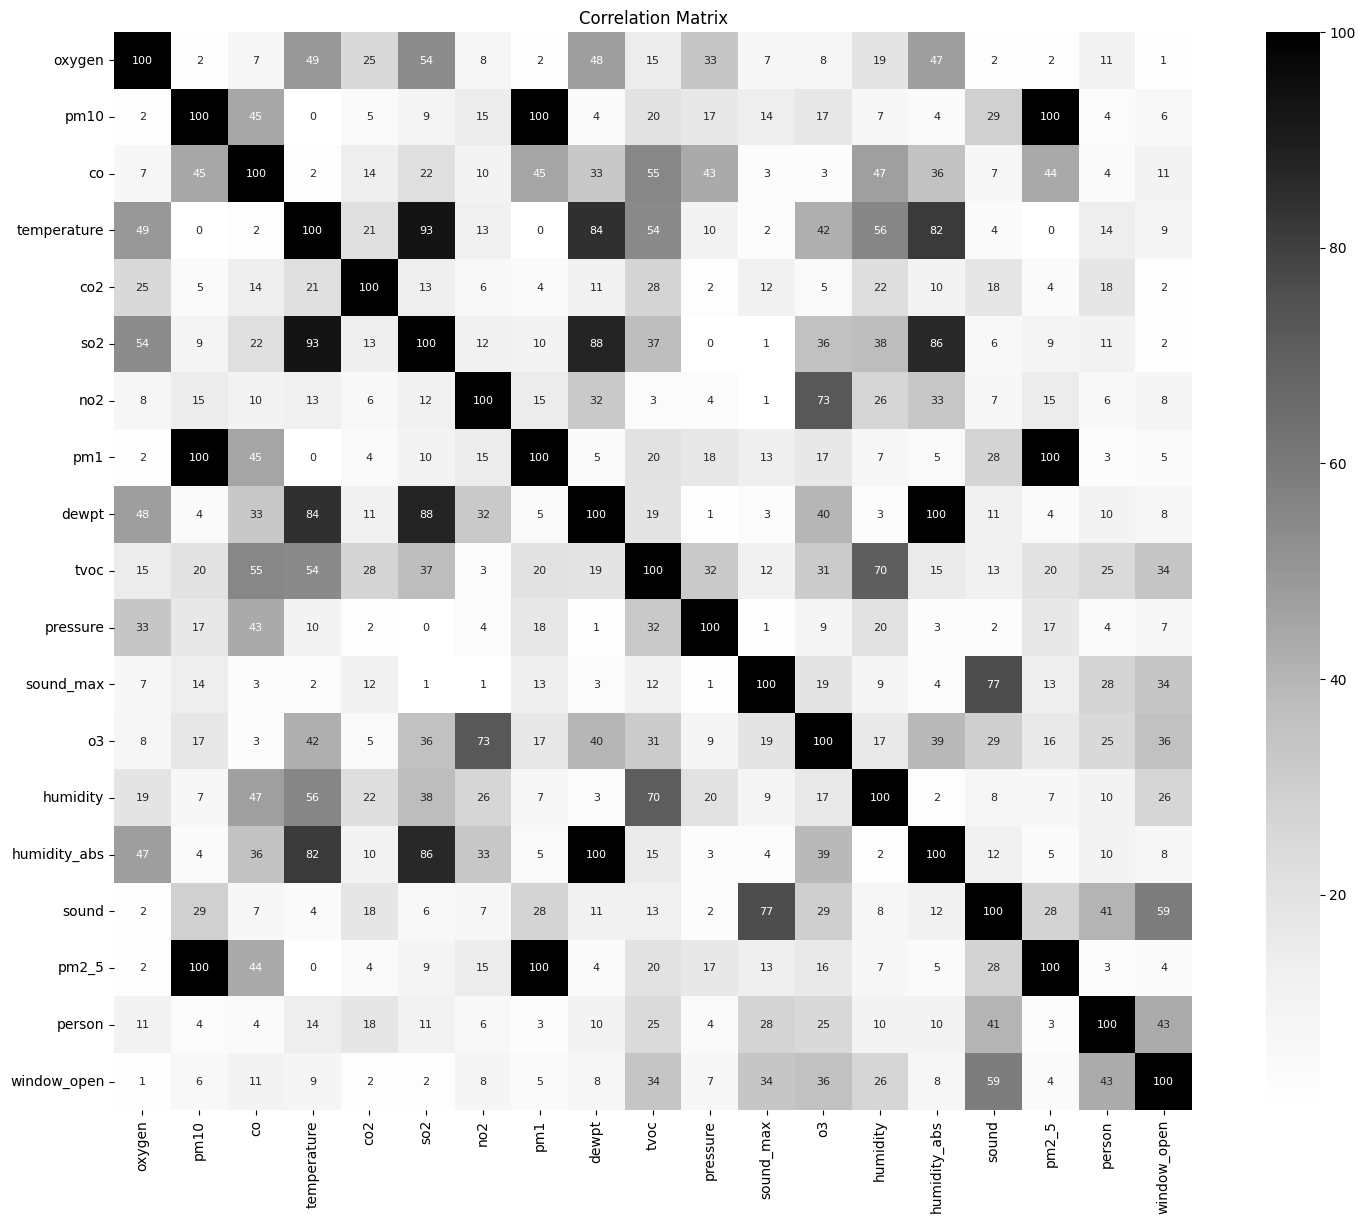

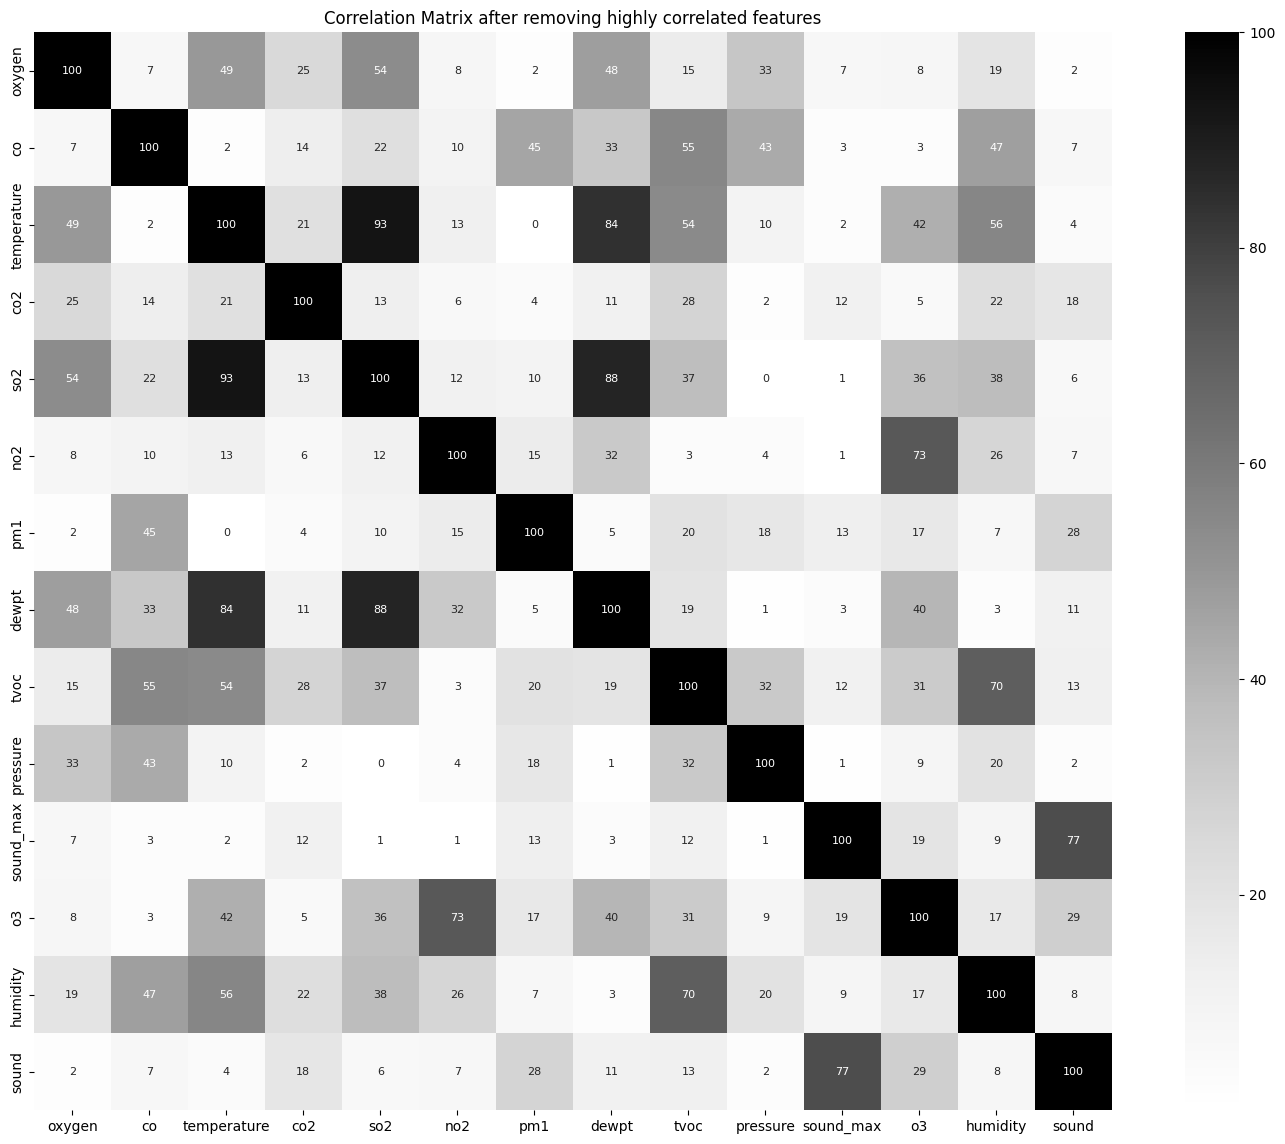

In [9]:
corr = df.corr(min_periods=1000)
high_corr = np.abs(corr)*100
f, ax = plt.subplots(figsize=(19,14))
sns.heatmap(high_corr, cbar=True,annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8},cmap='Greys')
plt.title('Correlation Matrix')
plt.show()

##### drop 100% correlated features

remove_list = ['pm10','pm2_5','humidity_abs']
features.drop(columns=remove_list,inplace=True)
features1.drop(columns=remove_list,inplace=True)
features2.drop(columns=remove_list,inplace=True)
df1.drop(columns=remove_list,inplace=True)
df2.drop(columns=remove_list,inplace=True)

corr = features.corr(min_periods=1000)
high_corr = np.abs(corr)*100
f, ax = plt.subplots(figsize=(19,14))
sns.heatmap(high_corr, cbar=True,annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8},cmap='Greys')
plt.title('Correlation Matrix after removing highly correlated features')
plt.show()


**test Standardization function**

In [10]:
# ### test standardize
# t = np.array([[[1,2],[3,7]],[[5,6],[7,8]],[[5,6],[7,8]]])
# sh = t.shape
# print(t)
# # print(t - np.array([1,0]).reshape(1,2,1))
# mean = [1,0]
# std = [2,1]
# tt,p1,p2 = standardize(t,mode=1)
# print(tt,p1,p2)
# print(standardize_with_params(t,mean=p1,std=p2)==tt)

**test sliding over data**

In [11]:
# ### testing sliding

# _features = pd.DataFrame({'x': [0,1,2,3,4,5,6,7,8,9],'z': [0,1,2,3,4,5,6,7,8,9]})
# _targets = pd.DataFrame({'y': [0,0,1,1,1,0,1,1,0,0],'m': [2,2,2,3,3,2,3,2,3,2]}) 
# df3 = pd.concat([_features,_targets],axis=1)
# print(df3)
# # _x,_y= SlidingWindow(3,2,get_x=[0,1],get_y=[2,3],horizon = 3)(df3)
# _x,_y = sliding(3,2,_features,_targets)
# print(_x.shape,_y.shape,_x,_y)

**testi underSampling**

In [12]:
# ### testing undersampling
# test = pd.DataFrame([[1,2,0,0],[3,4,0,1],[5,6,0,0],[7,8,1,1],[9,10,0,0],[11,12,0,0],[13,14,0,0],[15,16,1,0],[15,16,1,0]],columns=['x','y','person','window_open'])
# print(test)
# t = test.filter(['person','window_open'])
# f = test.drop(columns = ['person','window_open'])
# X,y=under_sample(test,2,2,1)
# print(X.shape,y.shape,'\n',X,y)
# # print(X,y)
# print(X.shape,y.shape)


**Perform undersampling and segmentation**

In [13]:
under_window = 30
seq_len = 15
stride = 1
# standard_mode = 1 ## 1=normalizec, 2= minmax

# reset index 
# df_mini.reset_index(drop=True)
# features_mini.reset_index(drop=True)
# targets.reset_index(drop=True)
#t = df_mini.values
#X, y = SlidingWindow(window_len=window , stride = stride, get_x = [0,1], get_y = [2])(df_mini)

## undersampling and sliding and standardize
X1,y1= under_sample(df_mini1,under_window,seq_len,stride)
X2,y2= under_sample(df_mini2,under_window,seq_len,stride)



### standardizing segments after undersampling

# mean,std from dataset after undersampling
# X1_ = standardize_with_params(X1,mean = mean1, std = std1)
# X2_ = standardize_with_params(X2,mean = mean1, std = std2)

# mean,std from dataset before undersampling
# X1_ = standardize_with_params(X1,min = features_mini1.min(axis=0), max = features_mini1.max(axis=0))
# X2_ = standardize_with_params(X2,min = features_mini2.min(axis=0), max = features_mini2.max(axis=0))


##################################################################################################
# # standardize the whole data without undersampling

# features_mini1 = standardize_with_params(features_mini1,mean = features_mini1.mean(axis=0),std = features_mini1.std(axis=0))
# features_mini2 = standardize_with_params(features_mini2,mean = features_mini2.mean(axis=0),std = features_mini2.std(axis=0))

# ## sliding the whole data
# X1_,y1 = sliding(seq_len,stride,features_mini1,targets1)#.loc[:,'person'])
# X2_,y2 = sliding(seq_len,stride,features_mini2,targets2)#.loc[:,'person'])

X = concat(X1,X2)
# X = concat(X1_,X2_)
y = concat(y1,y2)
X.shape, y.shape


((3044, 4, 15), (3044, 2))

In [14]:
print(type(y))
print(X.dtype)

<class 'numpy.ndarray'>
float32


**SMOTE Oversampling (destroys the time series !!!)**

In [15]:
# from imblearn.over_sampling import SMOTE,KMeansSMOTE
# from sklearn.model_selection import train_test_split

# ##### NOTE THE SHUFFLE AND TIME SERIES
# x_train, x_valid, y_train, y_valid = train_test_split(df_mini.iloc[:,0:-1], df_mini.iloc[:,-1], test_size=0.2, shuffle=False)

# print(y_train.value_counts())
# ### get array of dataset train and target

# # train = to_np(dsets.train[:][0])
# # tar = to_np(dsets.train[:][1])
# # print(tar.shape,train.shape)


# ### Apply SMOTE only on train dataset to avoid data leakage
# sm = SMOTE(random_state=42,sampling_strategy={1:20000,2:10000})

# x_res, y_res = sm.fit_resample(x_train, y_train)
# print(y_res.value_counts())

# ### create sliding windows
# x_train,y_train = sliding(window,stride,x_res,y_res)
# x_valid,y_valid = sliding(window,stride,x_valid,y_valid)
# print(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape)



**test custom torch datasets and dataloaders**

In [16]:
# ds = MyDataSet(X,y,transform=ToTensor())
# bs = 32

# splits = TrainValidTestSplitter()(y)

# tsets = MyDataSet(X[splits[0]], y[splits[0]])#, transform=tfms) #train dataset
# vsets = MyDataSet(X[splits[1]], y[splits[1]])#, transform=tfms) #valid dataset

# tls = DataLoader(tsets, batch_size=bs, shuffle=False, num_workers=2)
# vls = DataLoader(vsets, batch_size=bs, shuffle=False, num_workers=2)
# classes = ('person','window_open')


**Train**

Epoch [1], Training_Loss: 0.3413,valid_Loss: 0.2627, valid_accuracy: 77.7961%
Epoch [2], Training_Loss: 0.3063,valid_Loss: 0.2239, valid_accuracy: 82.7303%
Epoch [3], Training_Loss: 0.2789,valid_Loss: 0.1915, valid_accuracy: 86.0197%
Epoch [4], Training_Loss: 0.2485,valid_Loss: 0.1847, valid_accuracy: 86.5132%
Epoch [5], Training_Loss: 0.2212,valid_Loss: 0.1792, valid_accuracy: 86.8421%
Epoch [6], Training_Loss: 0.1887,valid_Loss: 0.1630, valid_accuracy: 87.8289%
Epoch [7], Training_Loss: 0.1670,valid_Loss: 0.1536, valid_accuracy: 88.3224%
Epoch [8], Training_Loss: 0.1466,valid_Loss: 0.1441, valid_accuracy: 89.6382%
Epoch [9], Training_Loss: 0.1265,valid_Loss: 0.1400, valid_accuracy: 90.2961%
Epoch [10], Training_Loss: 0.1118,valid_Loss: 0.1405, valid_accuracy: 90.6250%
Epoch [11], Training_Loss: 0.0988,valid_Loss: 0.1386, valid_accuracy: 90.2961%
Epoch [12], Training_Loss: 0.0883,valid_Loss: 0.1398, valid_accuracy: 89.6382%
Epoch [13], Training_Loss: 0.0784,valid_Loss: 0.1408, valid_a

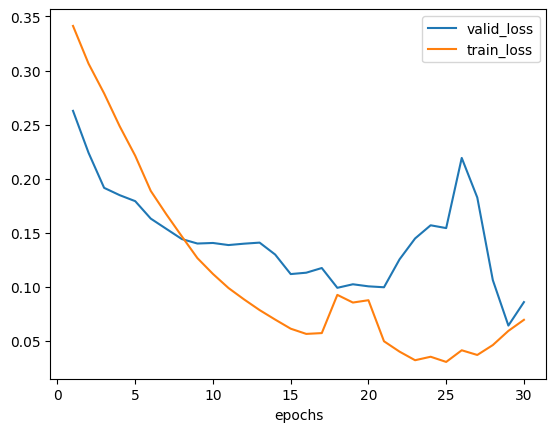

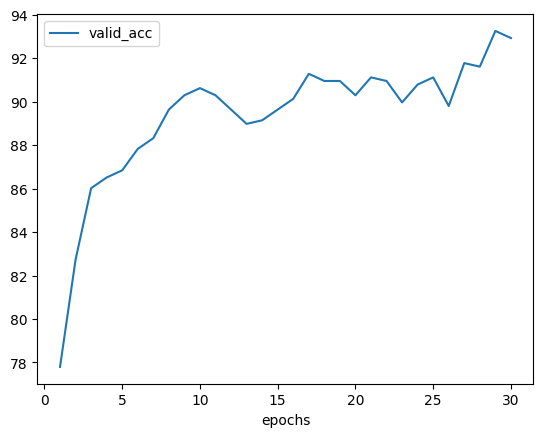

In [19]:
# # model = ConvNet(X.shape[1],y.shape[1]).to(device)
splits = TrainValidTestSplitter(test_size=0.1)(y)

#standardize train set, then use params to standardize valid and test
# for MyLearner this is done internally

x_train,p1,p2 = standardize(X[splits[0]],mode=1)
x_valid = standardize_with_params(X[splits[1]],mean=p1,std=p2)


model = MyFCN(X.shape[1],y.shape[1])
learn = MyLearner(X,y,model,splits, stand_mode=1) #### normalize
learn.fit(30)

# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.01)



**Evaluate on test data **

Accuracy: 90.4605%


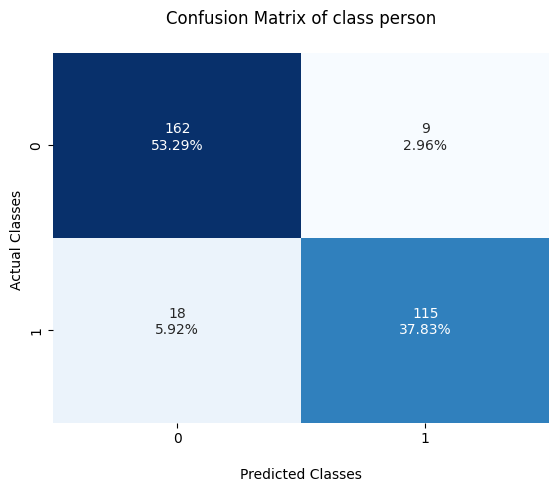

f1 score: 0.8949416342412451



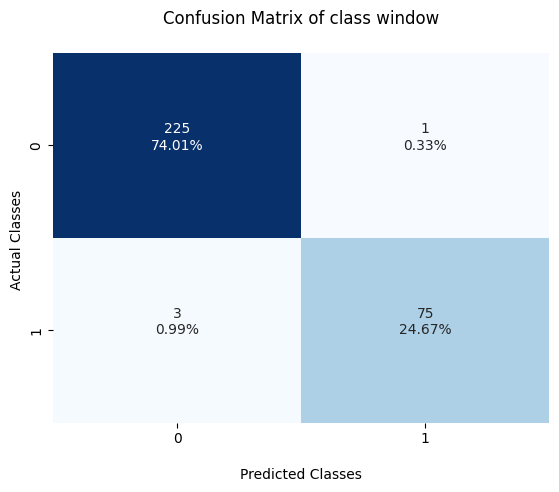

f1 score: 0.974025974025974



In [20]:
x_test = standardize_with_params(X[splits[2]],mean=p1,std=p2)
learn.eval(x_test,y[splits[2]])

**tsai LEARNER**

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.479799,0.352931,0.866776,00:00
1,0.332992,0.241156,0.898849,00:00
2,0.278163,0.203295,0.925164,00:00
3,0.242038,0.201142,0.925164,00:00
4,0.211362,0.177485,0.928454,00:00
5,0.202858,0.169610,0.940789,00:00
6,0.182086,0.171921,0.938322,00:00
7,0.159634,0.155269,0.948191,00:00
8,0.147761,0.135591,0.946546,00:00
9,0.144781,0.138422,0.948191,00:00


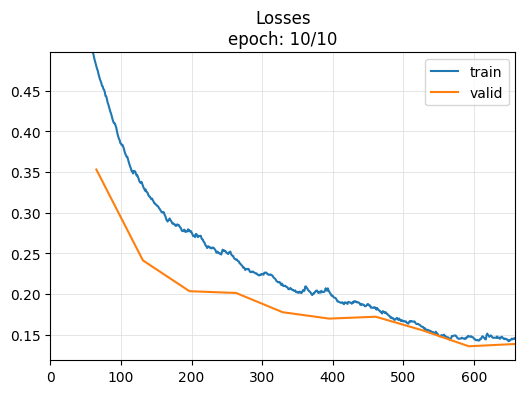

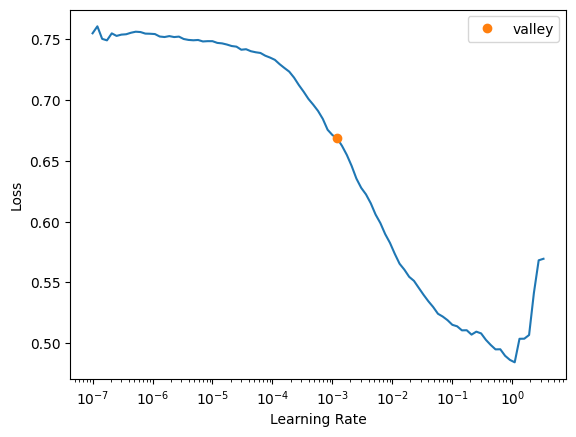

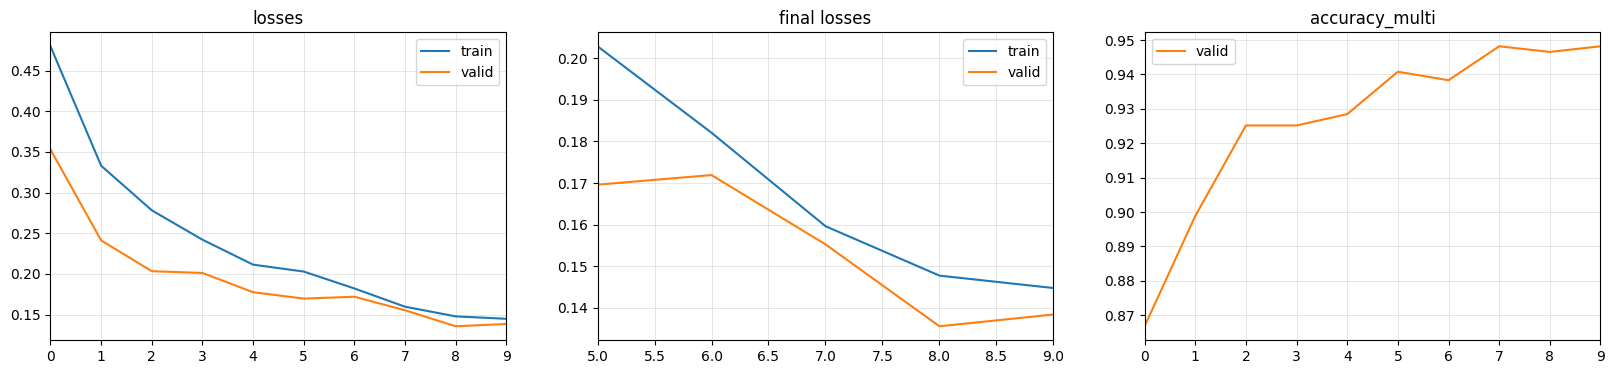

FlattenedLoss of BCEWithLogitsLoss()


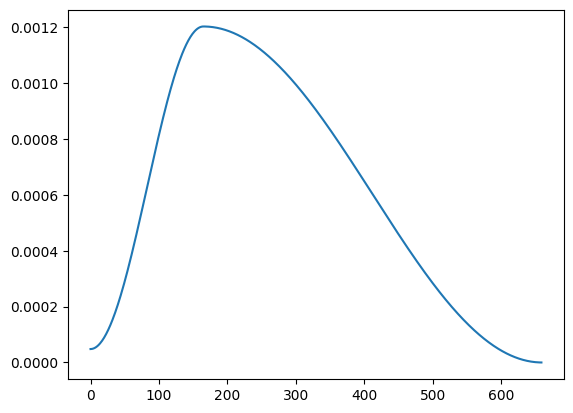

In [21]:
######## remove standardization from above at first, also remove sigmoid from the network*****************

# splits = TimeSplitter()(y)
splits = TrainValidTestSplitter(test_size=0.1)(y)
tfms  = [None, MultiCategorize()] 
batch_tfms = TSStandardize()

#### standardization
x_train,p1,p2 = standardize(X[splits[0]],mode=1)
x_valid = standardize_with_params(X[splits[1]],mean=p1,std=p2)
tsets = TSDatasets(x_train, y[splits[0]], tfms=tfms, inplace=True)
vsets = TSDatasets(x_valid, y[splits[1]], tfms=tfms, inplace=True)
dls   = TSDataLoaders.from_dsets(tsets, vsets, bs = 32, num_workers=2)#,batch_tfms=batch_tfms) ### note the normalization

#### use batch normalization instead
# dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
# dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs = 32, num_workers=2,batch_tfms=batch_tfms) ### note the normalization


k={}
model = create_model(FCN, dls.vars,dls.c,dls,**k)

#### note the accuracy_multi and MultiCategorize() contains BCEwithlogits not normal BCE
learn = Learner(dls, model, metrics=accuracy_multi,cbs = ShowGraph())
# learn.fit_one_cycle(10)

learn.fit_one_cycle(10,learn.lr_find().valley) ## learning rate annealing

plt.figure()
plt.plot(learn.recorder.lrs)


print(learn.loss_func)

##### save and load pkl model
# learn.export('models/learn.pkl')
# learn = load_learner('models/learn.pkl')

**get train loss, valid loss and accuracy**

In [24]:
# m = np.array(learn.recorder.values)
# plt.figure()
# plt.plot(m[:,0])
# plt.plot(m[:,1])
# plt.show()

**EVALUATION ON TEST DATA SET**

torch.Size([304, 2]) torch.Size([304, 2])
Accuracy: 90.78947


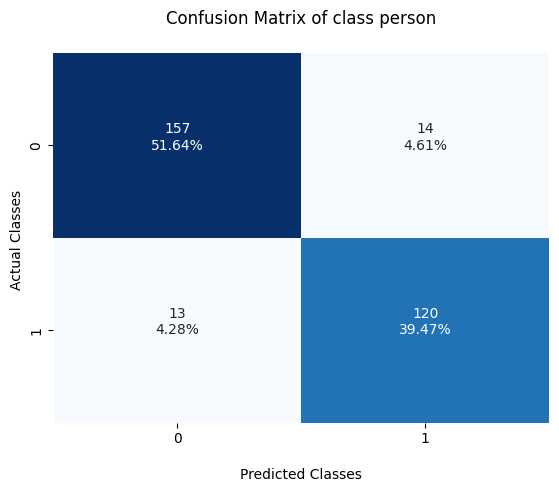

f1 score: 0.8988764044943821



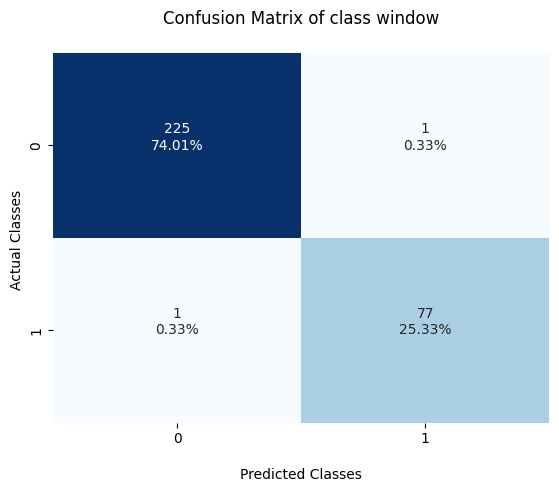

f1 score: 0.9871794871794872



In [25]:
#### Adding dataset to apply same dls valid tfms on test

### standardize test set with train parameters (apply Multicategorize transform)
x_test = standardize_with_params(X[splits[2]],mean=p1,std=p2)
test_set = TSDatasets(x_test, y[splits[2]], tfms=tfms, inplace=True)
test_dl   = TSDataLoader(test_set, bs = 32, num_workers=2)#,batch_tfms=batch_tfms) ### note the normalization
next(iter(test_dl))
 
# apply batch_normalization as in valid data set, but each with its own parameters
# test_ds = dls.valid.dataset.add_test(X[splits[2]], y[splits[2]]) #X and y would be your test data (segmented)
# test_dl = dls.valid.new(test_ds)
# next(iter(test_dl))

#### evaluating

test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True)#,reorder = False)

print(test_targets.shape,test_preds.shape)
# print(f'Accuracy: {(test_targets == test_preds).float().mean():0.5f}') ## single label 
# print(f'f1 score: {f1_score(test_targets,test_preds,average=None)}\n') # to get f1 score for each class use (average=None)
# ### number of classes in validation set
# n_classes = pd.DataFrame(test_targets).value_counts().shape[0]
# plot_confusion(test_targets,test_preds,n_classes)


print(f'Accuracy: {(100/test_targets.shape[0])*torch.all((test_preds == test_targets),dim=1).sum():0.5f}') ## multi-label
n_classes = test_targets.shape[1]
plot_confusion(test_targets[:,0],test_preds[:,0],n_classes,name = 'person')
print(f'f1 score: {f1_score(test_targets[:,0],test_preds[:,0])}\n') # to get f1 score for each class use (average=None)


### window class
### number of classes in validation set
plot_confusion(test_targets[:,1],test_preds[:,1],n_classes,name = 'window')
print(f'f1 score: {f1_score(test_targets[:,1],test_preds[:,1])}\n') # to get f1 score for each class use (average=None)


**Benchmarking**

In [21]:
dsid = 'LSST' 

splits = TrainValidTestSplitter()(y)
tfms  = [None, MultiCategorize()] 
batch_tfms = TSStandardize()
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs = 32, num_workers=2)

archs = [(FCN, {}), (ResNet, {}), (xresnet1d34, {}), (ResCNN, {}), 
         (LSTM, {'n_layers':1, 'bidirectional': False}), (LSTM, {'n_layers':2, 'bidirectional': False}), (LSTM, {'n_layers':3, 'bidirectional': False}), 
         (LSTM, {'n_layers':1, 'bidirectional': True}), (LSTM, {'n_layers':2, 'bidirectional': True}), (LSTM, {'n_layers':3, 'bidirectional': True}),
         (InceptionTime, {}), (XceptionTime, {})]

results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])
for i, (arch, k) in enumerate(archs):
    model = create_model(arch,dls.vars,dls.c, dls, **k)
    print(model.__class__.__name__)
    learn = Learner(dls, model,  metrics=accuracy_multi)
    start = time.time()
    learn.fit_one_cycle(10, 1e-4)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], int(elapsed)]
    results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
    display(results)

,arch,hyperparams,total params,train loss,valid loss,accuracy,time
0,InceptionTime,{},458178,0.058620,0.042858,0.988792,22
1,ResNet,{},486658,0.084105,0.053017,0.986301,15
2,xresnet1d34,{},7229794,0.136803,0.094654,0.974471,34
3,ResCNN,{},264451,0.109157,0.087109,0.974471,12
4,FCN,{},278658,0.141349,0.121470,0.963885,8
5,LSTM,"{'n_layers': 2, 'bidirectional': True}",337202,0.252366,0.264764,0.881071,9
6,LSTM,"{'n_layers': 2, 'bidirectional': False}",128602,0.279730,0.289256,0.868618,8
7,LSTM,"{'n_layers': 1, 'bidirectional': False}",47802,0.312783,0.315979,0.867995,7
8,LSTM,"{'n_layers': 1, 'bidirectional': True}",95602,0.315801,0.322063,0.863636,9
9,LSTM,"{'n_layers': 3, 'bidirectional': True}",578802,0.275589,0.287117,0.860523,12


XceptionTime


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.697311,0.624615,0.627646,00:02
1,0.596293,0.551216,0.881694,00:01
2,0.566088,0.539567,0.899751,00:01
3,0.561168,0.541117,0.930884,00:01
4,0.554062,0.536136,0.932752,00:02
5,0.551351,0.535705,0.927148,00:02
6,0.548622,0.530471,0.928394,00:02
7,0.547889,0.530346,0.935866,00:02
8,0.548447,0.531433,0.938979,00:01
9,0.548113,0.531555,0.937733,00:02


,arch,hyperparams,total params,train loss,valid loss,accuracy,time
0,InceptionTime,{},458178,0.058620,0.042858,0.988792,22
1,ResNet,{},486658,0.084105,0.053017,0.986301,15
2,xresnet1d34,{},7229794,0.136803,0.094654,0.974471,34
3,ResCNN,{},264451,0.109157,0.087109,0.974471,12
4,FCN,{},278658,0.141349,0.121470,0.963885,8
5,XceptionTime,{},401780,0.548113,0.531555,0.937733,20
6,LSTM,"{'n_layers': 2, 'bidirectional': True}",337202,0.252366,0.264764,0.881071,9
7,LSTM,"{'n_layers': 2, 'bidirectional': False}",128602,0.279730,0.289256,0.868618,8
8,LSTM,"{'n_layers': 1, 'bidirectional': False}",47802,0.312783,0.315979,0.867995,7
9,LSTM,"{'n_layers': 1, 'bidirectional': True}",95602,0.315801,0.322063,0.863636,9


In [ ]:
learn.feature_importance()

In [ ]:
model.state_dict

**optuna for HP optimization**

In [ ]:
import optuna
from optuna.integration import FastAIPruningCallback

num_epochs = 5
num_optuna_trials = 50
    
def objective(trial:optuna.Trial):
    # Define search space here. Supported search space are 
    #num_filters = trial.suggest_categorical('num_filters', [32, 64, 96, 128]) 
    #dropout_rate = trial.suggest_float("dropout_rate", 0.0, 1.0)
    lr = trial.suggest_float("Learning_rate", 1e-8, 1e-6, log=True)
    
    learn = TSClassifier(X, y, splits=splits,lr =  lr, path='models', arch=InceptionTimePlus, arch_config=dict(depth=4,act=nn.ReLU, fc_dropout=0.5), batch_tfms=batch_tfms, metrics=accuracy, cbs=[ShowGraph(),FastAIPruningCallback(trial)])

    
    learn.fit_one_cycle(num_epochs, lr_max=1e-3)
            
    # return the valid_loss - learn.recorder.values returns [[train_loss, valid_loss, acc]]
    return learn.recorder.values[-1][1]

In [ ]:
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=num_optuna_trials, show_progress_bar=False)

In [ ]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

**calculate time**

In [ ]:
import timeit

start = timeit.default_timer()



 
learn = TSClassifier(X, y, splits=splits, lr=1e-5,path='models', arch=LSTMPlus , batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10)
stop = timeit.default_timer()

print('Time: ', stop - start) 